In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as pn
import seaborn as sns

from google.cloud import bigquery
from google.oauth2 import service_account


In [51]:
query = "select * from `tim-bigdata-****************` "

credentials = service_account.Credentials.from_service_account_file(filename='chave.json', 
                                                                 scopes=["https://www.googleapis.com/auth/cloud-platform"])


In [52]:
df = pd.read_gbq(credentials=credentials, query=query)
df

C:\ProgramData\Anaconda3\lib\site-packages\google\cloud\bigquery\table.py:2007: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,ACCID,Regional,DCC,VIA,flg_link_novo,Mean_MAX_Traffic_kbps,Std_MAX_Traffic_kbps,Var_MAX_Traffic_kbps,Mean_Availability_Avg,Mean_latencia_trat,Availability_MENOR_95,Availability_MAIOR_95,QTD_DIAS,Availability_MENOR_95_PERC,Availability_MAIOR_95_PERC
0,598943,TLE,BHE,VIA3,1.0,4.916501e+06,4.053484e+06,1.643073e+13,0.974004,8.0,2.0,15.0,17.0,0.117647,0.882353
1,598636,TLE,BHE,VIA1,1.0,2.051834e+07,7.978786e+06,6.366102e+13,0.990351,16.0,1.0,23.0,24.0,0.041667,0.958333
2,598636,TNE,SDR,VIA1,1.0,2.055947e+07,7.933603e+06,6.294205e+13,0.990351,16.0,1.0,23.0,24.0,0.041667,0.958333
3,574441,TNE,SDR,VIA3,0.0,3.453824e+07,1.255484e+07,1.576240e+14,0.998000,12.0,0.0,40.0,40.0,0.000000,1.000000
4,566788,TNE,SDR,VIA2,0.0,2.007715e+07,6.024951e+06,3.630003e+13,0.983391,15.0,3.0,37.0,40.0,0.075000,0.925000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,97034,TNO,BLM,VIA5,0.0,3.521712e+07,2.592217e+07,6.719588e+14,0.604195,28.0,47.0,14.0,61.0,0.770492,0.229508
119,43367/00696,TNO,BLM,VIA3,0.0,4.541501e+07,1.839337e+07,3.383161e+14,0.947059,22.0,10.0,51.0,61.0,0.163934,0.836066
120,43367/00702,TNO,BLM,VIA3,0.0,4.579781e+07,1.903158e+07,3.622012e+14,0.946531,22.0,10.0,51.0,61.0,0.163934,0.836066
121,585934,TNO,BLM,VIA4,0.0,4.107983e+07,2.574718e+07,6.629174e+14,0.870673,21.0,14.0,47.0,61.0,0.229508,0.770492


In [53]:
df_var_trafego = df[['ACCID','Mean_MAX_Traffic_kbps','Std_MAX_Traffic_kbps','Var_MAX_Traffic_kbps']]
df_var_trafego

,ACCID,Mean_MAX_Traffic_kbps,Std_MAX_Traffic_kbps,Var_MAX_Traffic_kbps
0,598943,4.916501e+06,4.053484e+06,1.643073e+13
1,598636,2.051834e+07,7.978786e+06,6.366102e+13
2,598636,2.055947e+07,7.933603e+06,6.294205e+13
3,574441,3.453824e+07,1.255484e+07,1.576240e+14
4,566788,2.007715e+07,6.024951e+06,3.630003e+13
...,...,...,...,...
118,97034,3.521712e+07,2.592217e+07,6.719588e+14
119,43367/00696,4.541501e+07,1.839337e+07,3.383161e+14
120,43367/00702,4.579781e+07,1.903158e+07,3.622012e+14
121,585934,4.107983e+07,2.574718e+07,6.629174e+14


In [116]:
df_var_trafego.dtypes

ACCID                     object
Mean_MAX_Traffic_kbps    float64
Std_MAX_Traffic_kbps     float64
Var_MAX_Traffic_kbps     float64
dtype: object

In [114]:
#Analise a matriz de correlação dos dados

#cálculo da matriz de correlação

C = df_var_trafego.iloc[:,].corr()
C

,Mean_MAX_Traffic_kbps,Std_MAX_Traffic_kbps,Var_MAX_Traffic_kbps
Mean_MAX_Traffic_kbps,1.000000,0.486922,0.400605
Std_MAX_Traffic_kbps,0.486922,1.000000,0.958385
Var_MAX_Traffic_kbps,0.400605,0.958385,1.000000


In [95]:
#Determinando Autovalores e Autovetores
import numpy as np
autovalores, autovetores = np.linalg.eig(C)

In [96]:
#imprimindo autovalores de C
print("Autovalores:{}".format(autovalores))

Autovalores:[2.26912715 0.69416999 0.03670286]


In [97]:
#imprimindo autovetores de c
print("Autovetores:{}".format(autovetores))

Autovetores:[[ 0.44369807  0.89258072  0.08019775]
 [ 0.64223077 -0.25427966 -0.72310545]
 [ 0.62503733 -0.37234596  0.6860662 ]]


In [98]:
#Ordenando os autovalores do maior para o menor. Necessario apenas se não estiverem ordenados

pares_autos = [(np.abs(autovalores[i]),
                autovetores[:,i]) 
               for i in range(len(autovalores))]

pares_autos.sort()
#pares_autos
pares_autos.reverse()


In [99]:
pares_autos

[(2.269127154978225, array([0.44369807, 0.64223077, 0.62503733])),
 (0.6941699864403721, array([ 0.89258072, -0.25427966, -0.37234596])),
 (0.03670285858140138, array([ 0.08019775, -0.72310545,  0.6860662 ]))]

In [100]:
#variancia explicada acumulada de cada autovalor
soma_total = sum(autovalores)

In [101]:
var = [(i/soma_total)*100 for i in sorted(autovalores, reverse=True)]

In [102]:
acum_var = np.cumsum(var)

In [103]:
x = ['PCA %s' %i for i in range(1, len(autovalores) +1)]

In [104]:
x

['PCA 1', 'PCA 2', 'PCA 3']

In [105]:
df_pca = pd.DataFrame({
    'autovalores':autovalores,
    'acum_var':acum_var,
    'var':var,
    'componente_P':x
    })

In [106]:
df_pca

,autovalores,acum_var,var,componente_P
0,2.269127,75.637572,75.637572,PCA 1
1,0.694170,98.776571,23.139000,PCA 2
2,0.036703,100.000000,1.223429,PCA 3


In [117]:
X = df_var_trafego.drop("ACCID",1)
X

,Mean_MAX_Traffic_kbps,Std_MAX_Traffic_kbps,Var_MAX_Traffic_kbps
0,4.916501e+06,4.053484e+06,1.643073e+13
1,2.051834e+07,7.978786e+06,6.366102e+13
2,2.055947e+07,7.933603e+06,6.294205e+13
3,3.453824e+07,1.255484e+07,1.576240e+14
4,2.007715e+07,6.024951e+06,3.630003e+13
...,...,...,...
118,3.521712e+07,2.592217e+07,6.719588e+14
119,4.541501e+07,1.839337e+07,3.383161e+14
120,4.579781e+07,1.903158e+07,3.622012e+14
121,4.107983e+07,2.574718e+07,6.629174e+14


In [118]:
autovetores

[array([0.44369807, 0.64223077, 0.62503733]),
 array([ 0.89258072, -0.25427966, -0.37234596]),
 array([ 0.08019775, -0.72310545,  0.6860662 ])]

In [164]:
n_comp = df_pca.shape[0]
autovetores = [p[1] for p in pares_autos]
A = autovetores[0:n_comp]
X = np.dot(X,np.array(A).T) 
df_new = pd.DataFrame(X,columns = x)
df_new['ACCID'] = df['ACCID']


In [163]:
df_new

,PCA 1,PCA 2,PCA 3,ACCID
0,1.020106e+13,1.214249e+13,4.297353e+12,598943
1,3.952411e+13,4.704619e+13,1.665013e+13,598636
2,3.907773e+13,4.651486e+13,1.646209e+13,598636
3,9.786124e+13,1.164858e+14,4.122556e+13,574441
4,2.253697e+13,2.682612e+13,9.494032e+12,566788
...,...,...,...,...
118,4.171873e+14,4.965849e+14,1.757467e+14,97034
119,2.100444e+14,2.500193e+14,8.848446e+13,43367/00696
120,2.248735e+14,2.676706e+14,9.473148e+13,43367/00702
121,4.115739e+14,4.899031e+14,1.733820e+14,585934


In [112]:
# verificar se a variancia de PCA1,PCA2,.... são iguais aos autovalores

df_new.drop('ACCID',1).cov()

,PCA 1,PCA 2,PCA 3
PCA 1,1.117938e+28,9.506337e+27,1.891247e+28
PCA 2,9.506337e+27,8.083672e+27,1.608214e+28
PCA 3,1.891247e+28,1.608214e+28,3.199476e+28


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


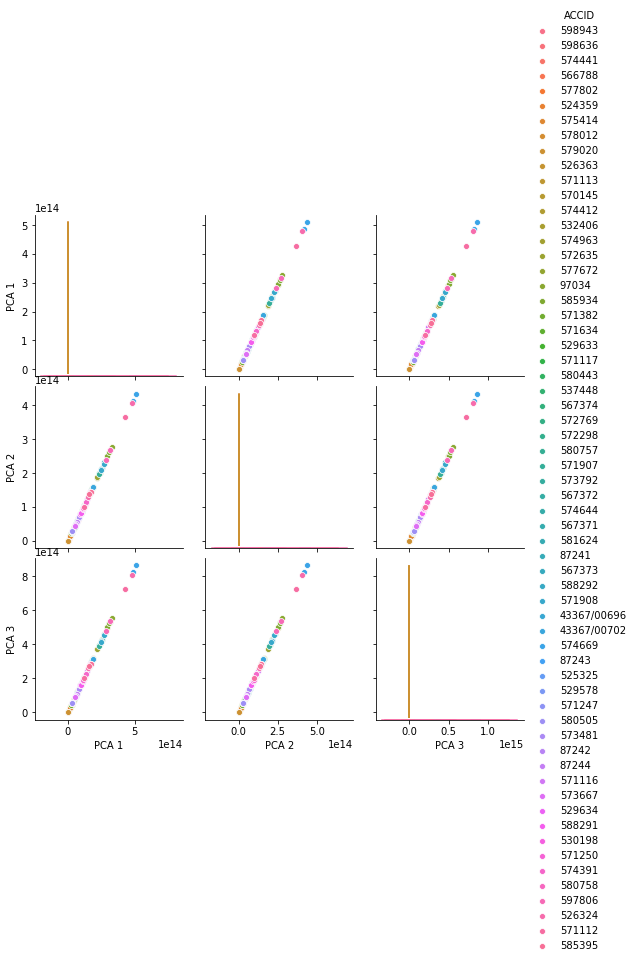

In [119]:
sns.pairplot(
    df_new, vars = x, hue='ACCID'
)
plt.show()

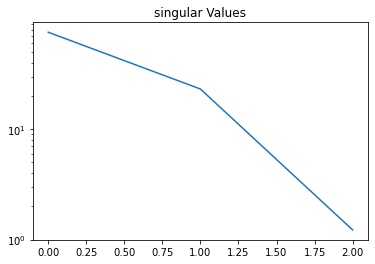

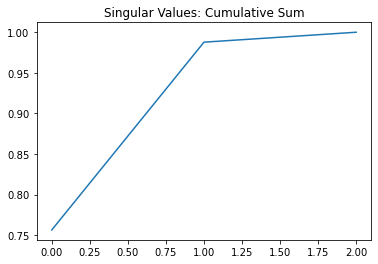

In [120]:
#verificar acumu_var

plt.figure(1)
plt.semilogy(df_pca['var'])
plt.title('singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(df_pca['var'])/np.sum(df_pca['var']))
plt.title('Singular Values: Cumulative Sum')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


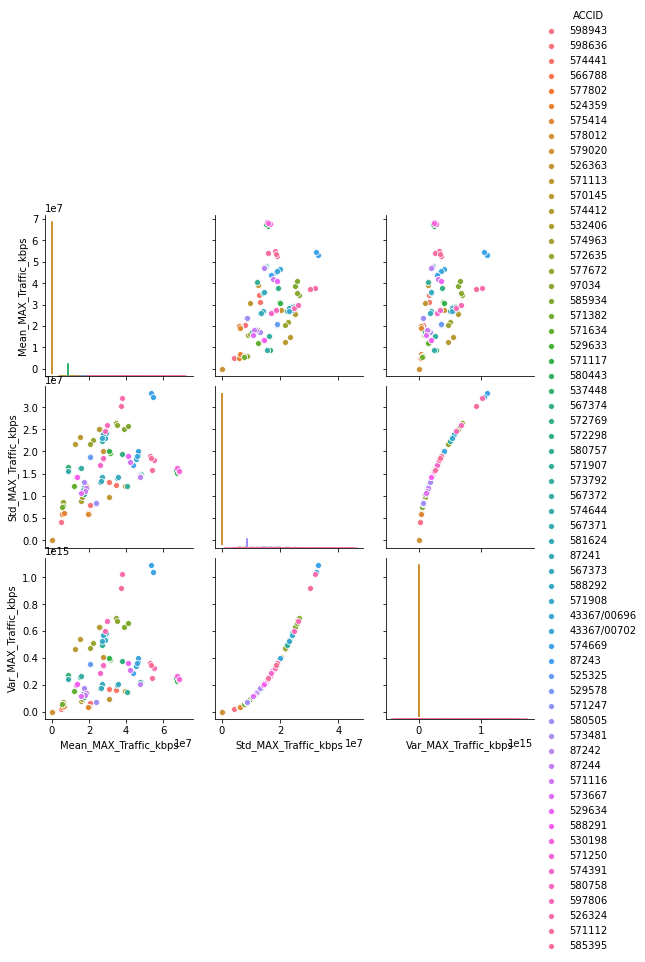

In [127]:
#variaveis com dataset original

sns.pairplot(
    df_var_trafego,
    vars = X,
    hue = 'ACCID'
)
plt.show()

# Aplicando PCA com Sklearn

In [170]:
from sklearn.decomposition import PCA

In [171]:
pca = PCA(n_components = n_comp)
pca.fit(X)

PCA(n_components=3)

In [172]:
#Autovalores
pca.explained_variance_

array([5.12578148e+28, 2.16835666e+14, 3.23804571e+12])

In [173]:
#autovetores
pca.components_

array([[ 0.91356123,  0.2688607 , -0.30515537],
       [-0.40641921,  0.63145192, -0.66037255],
       [ 0.01514272,  0.72731176,  0.68614014]])

In [174]:
#Variancia explicada
pca.explained_variance_ratio_

array([1.00000000e+00, 4.23029478e-15, 6.31717471e-17])

In [175]:
X = pca.transform(X)

In [177]:
new_df = pd.DataFrame(X, columns=['pc1','pc2','pc3'])

In [180]:
new_df

,pc1,pc2,pc3
0,-2.651011e+14,-1.591592e+07,2.719585e+06
1,-2.178709e+14,-1.539688e+06,9.295937e+05
2,-2.185898e+14,-1.479515e+06,9.571188e+05
3,-1.239079e+14,9.893976e+06,-3.085351e+05
4,-2.452318e+14,-1.266011e+06,2.104336e+06
...,...,...,...
118,3.904269e+14,-4.097504e+06,5.313313e+05
119,5.678419e+13,1.566259e+07,-5.882146e+05
120,8.066934e+13,1.536455e+07,-5.479461e+05
121,3.813855e+14,2.017969e+06,7.692513e+05


In [179]:
new_df.cov()

,pc1,pc2,pc3
pc1,5.125781e+28,9.495883e+13,-3.521963e+12
pc2,9.495883e+13,2.168357e+14,-1.204856e+04
pc3,-3.521963e+12,-1.204856e+04,3.238046e+12
